In [119]:
import pandas as pd

In [120]:
df = pd.read_csv("./bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [121]:
df.drop(['area_type' , 'availability'] , axis='columns' , inplace=True)

In [122]:
df.rename(columns={"size":"Size"} , inplace=True)

In [123]:
df.isna().sum()

location         1
Size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [124]:
df.drop(['society'] ,axis='columns' , inplace=True)

In [125]:
df.isna().sum()

location        1
Size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [126]:
print(df.columns)
x = ~(df['Size'].isna() | df['bath'].isna() | df.location.isna())
print(len(x))
df = df[x]
df = df.reset_index(drop=True)
df

Index(['location', 'Size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')
13320


,location,Size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13241,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13242,Richards Town,4 BHK,3600,5.0,NaN,400.00
13243,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13244,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [127]:
df.isna().sum()

location        0
Size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [128]:
df.drop(['balcony'] , axis='columns' , inplace=True)

In [129]:
df

,location,Size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13241,Whitefield,5 Bedroom,3453,4.0,231.00
13242,Richards Town,4 BHK,3600,5.0,400.00
13243,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13244,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [130]:
df=df[~df.isna()]

In [131]:
df.isna().sum()

location      0
Size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [132]:
df.iloc[13245]

location      Doddathoguru
Size                 1 BHK
total_sqft             550
bath                   1.0
price                 17.0
Name: 13245, dtype: object

In [133]:
BHK =[]
for bedroom in df['Size']:
    broken = bedroom.split(' ')
    BHK.append(broken[0])
print(len(BHK))
BHK_add = pd.DataFrame(BHK , columns=['BHK'])
BHK_add

13246


,BHK
0,2
1,4
2,3
3,3
4,2
...,...
13241,5
13242,4
13243,2
13244,4


In [134]:
df = pd.concat([df,BHK_add] , axis='columns')
df

,location,Size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13241,Whitefield,5 Bedroom,3453,4.0,231.00,5
13242,Richards Town,4 BHK,3600,5.0,400.00,4
13243,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13244,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [135]:
df.drop(['Size'] , axis='columns' , inplace=True)

In [136]:
df

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13241,Whitefield,3453,4.0,231.00,5
13242,Richards Town,3600,5.0,400.00,4
13243,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13244,Padmanabhanagar,4689,4.0,488.00,4


In [137]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [138]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [139]:
df["total_sqft"]=df.total_sqft.apply(convert_sqft_to_num)

In [140]:
df["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [141]:
df.total_sqft.fillna(df.total_sqft.median() , inplace=True)

In [142]:
df['price_per_sqdt'] = df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqdt
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [143]:
df.location = df.location.apply(lambda x: x.strip())

In [144]:
location_count = df.location.value_counts()

In [145]:
greater_than_10 = location_count[location_count >10]
greater_than_10

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
Nehru Nagar                   11
2nd Phase Judicial Layout     11
Banjara Layout                11
Narayanapura                  11
Marsur                        11
Name: count, Length: 241, dtype: int64

In [146]:
greater_than_10

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
Nehru Nagar                   11
2nd Phase Judicial Layout     11
Banjara Layout                11
Narayanapura                  11
Marsur                        11
Name: count, Length: 241, dtype: int64

In [147]:
def change(m):
    if m in greater_than_10:
        return m
    else:
        return "Others"

In [148]:
df.location = df.location.apply(change)

In [149]:
df.location.value_counts()

location
Others                2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [150]:
df.BHK = df.BHK.astype(float)

In [151]:
df[df.total_sqft/df.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqdt
9,Others,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
57,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
67,Devarachikkanahalli,1350.0,7.0,85.0,8.0,6296.296296
69,Others,500.0,3.0,100.0,3.0,20000.000000


In [152]:
df = df[~(df.total_sqft/df.BHK<300)]

In [153]:
df.rename(columns={"price_per_sqdt":"price_per_sqft"} , inplace=True)
df.price_per_sqft.describe()

C:\Users\Mrinal\AppData\Local\Temp\ipykernel_4000\3354638058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"price_per_sqdt":"price_per_sqft"} , inplace=True)


count     12494.000000
mean       6318.025015
std        4180.813180
min         267.829813
25%        4210.526316
50%        5295.073227
75%        6932.530120
max      176470.588235
Name: price_per_sqft, dtype: float64

In [154]:
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        print(key)
        print(subdf)
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

1st Block Jayanagar
                  location  total_sqft  bath  price  BHK  price_per_sqft
208    1st Block Jayanagar      2850.0   4.0  428.0  4.0    15017.543860
839    1st Block Jayanagar      1630.0   3.0  194.0  3.0    11901.840491
2135   1st Block Jayanagar      1875.0   2.0  235.0  3.0    12533.333333
2337   1st Block Jayanagar      2400.0   4.0  450.0  4.0    18750.000000
4959   1st Block Jayanagar      1000.0   3.0   60.0  2.0     6000.000000
7091   1st Block Jayanagar      1200.0   2.0  130.0  3.0    10833.333333
7311   1st Block Jayanagar      1235.0   2.0  148.0  2.0    11983.805668
7336   1st Block Jayanagar      2750.0   4.0  413.0  4.0    15018.181818
8450   1st Block Jayanagar      1760.0   3.0  115.0  3.0     6534.090909
10905  1st Block Jayanagar      2450.0   4.0  368.0  4.0    15020.408163
1st Phase JP Nagar
                 location  total_sqft  bath  price  BHK  price_per_sqft
927    1st Phase JP Nagar      2825.0   4.0  250.0  4.0     8849.557522
2089   1st Pha

LB Shastri Nagar
               location  total_sqft  bath  price  BHK  price_per_sqft
124    LB Shastri Nagar      1600.0   3.0   65.0  3.0     4062.500000
2901   LB Shastri Nagar      1043.0   2.0   55.0  2.0     5273.250240
5569   LB Shastri Nagar      1184.0   2.0   69.0  2.0     5827.702703
7060   LB Shastri Nagar       665.0   1.0   32.0  1.0     4812.030075
8541   LB Shastri Nagar      1250.0   2.0   48.5  2.0     3880.000000
9506   LB Shastri Nagar      1400.0   2.0   80.0  3.0     5714.285714
10911  LB Shastri Nagar      1184.0   2.0   62.0  2.0     5236.486486
11122  LB Shastri Nagar      2400.0   8.0  250.0  8.0    10416.666667
12487  LB Shastri Nagar      1200.0   2.0   47.0  2.0     3916.666667
13106  LB Shastri Nagar      1200.0   2.0   75.0  2.0     6250.000000
13202  LB Shastri Nagar      1000.0   2.0   49.5  2.0     4950.000000
Laggere
     location  total_sqft  bath  price  BHK  price_per_sqft
1727  Laggere      1200.0   1.0   48.0  1.0     4000.000000
2078  Laggere  

(10286, 6)

In [155]:
df.location.value_counts()

location
Others                  2313
Whitefield               484
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           191
                        ... 
Banjara Layout             4
HAL 2nd Stage              4
Thyagaraja Nagar           4
Vishveshwarya Layout       4
Marsur                     3
Name: count, Length: 242, dtype: int64

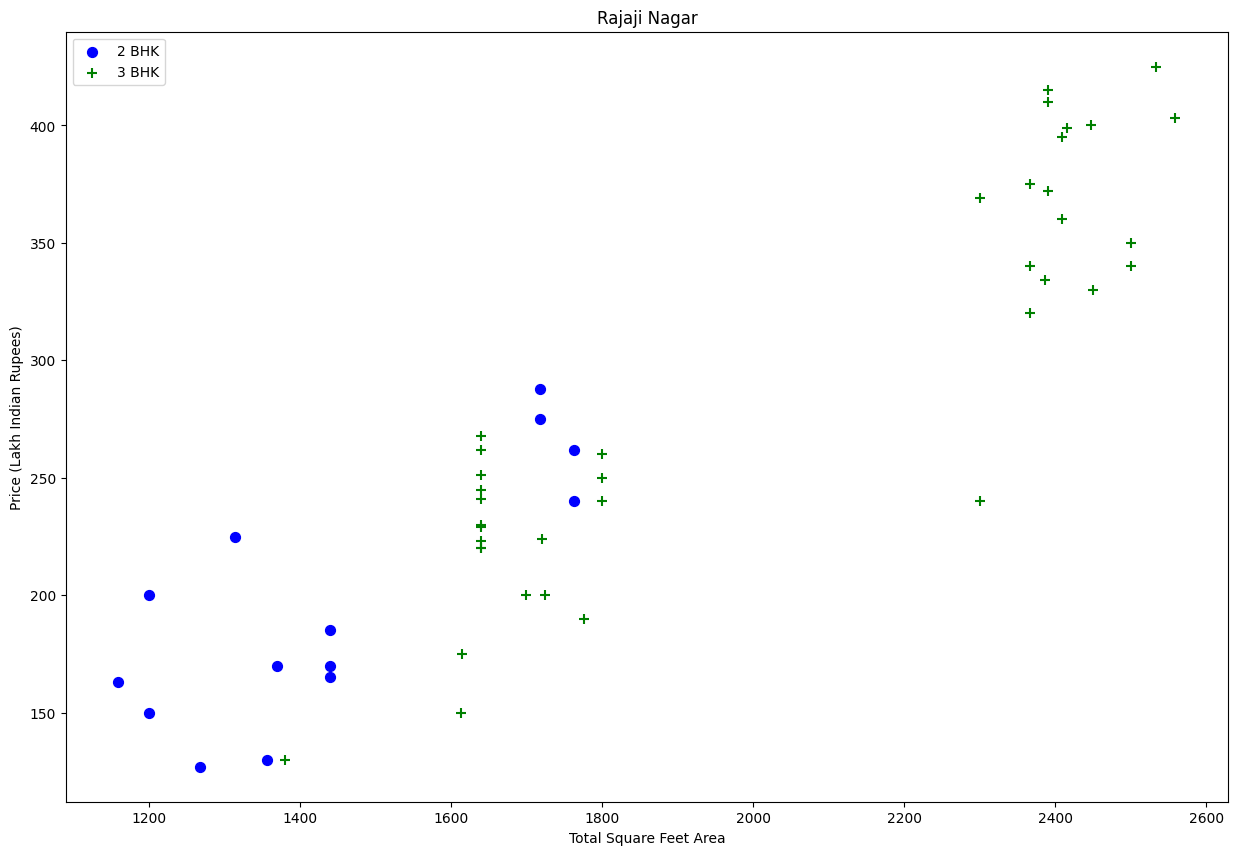

In [156]:
import matplotlib
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

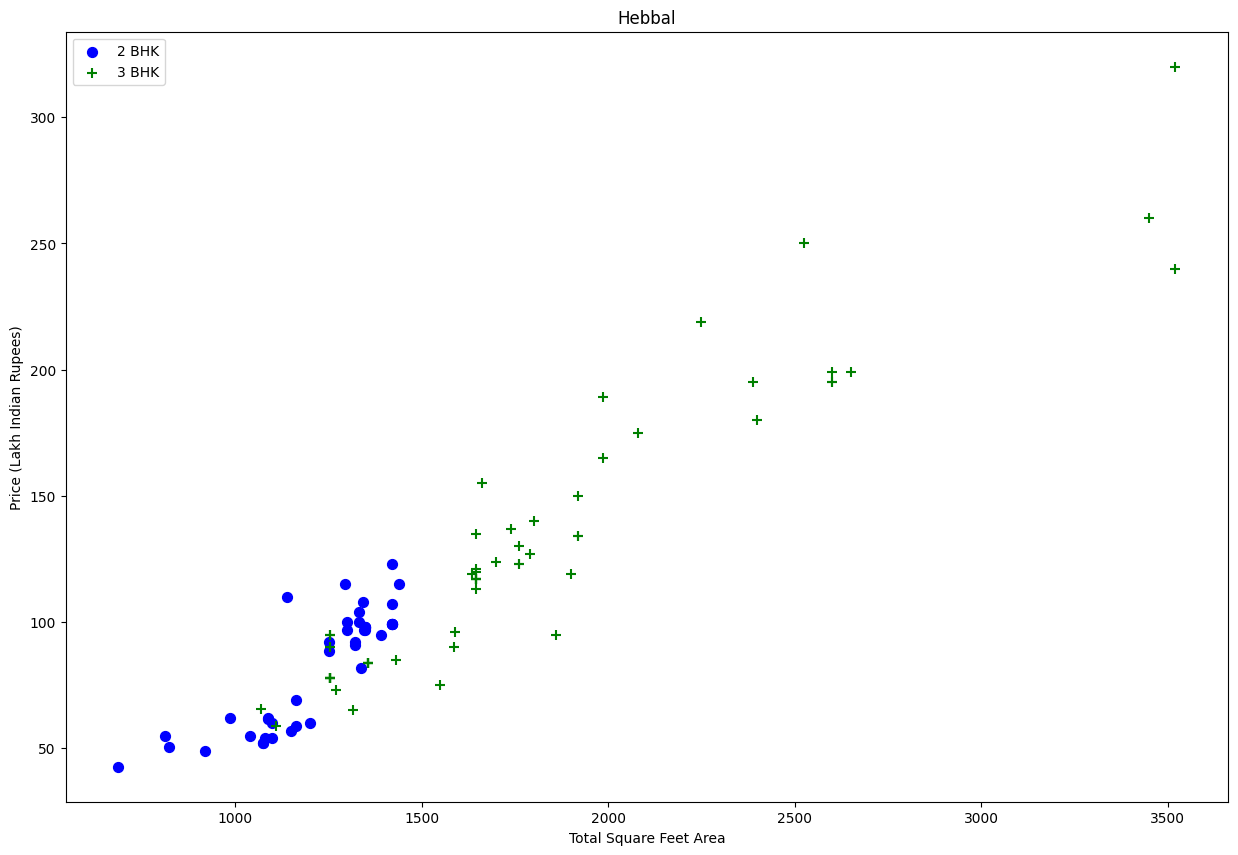

In [157]:
plot_scatter_chart(df ,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [158]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
# df8 = df7.copy()
print(df.shape  , df.location.value_counts())

(7335, 6) location
Others                   1138
Whitefield                246
Sarjapur  Road            191
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
HAL 2nd Stage               4
Vishveshwarya Layout        4
Vishwapriya Layout          4
Thyagaraja Nagar            4
Marsur                      3
Name: count, Length: 242, dtype: int64


In [159]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

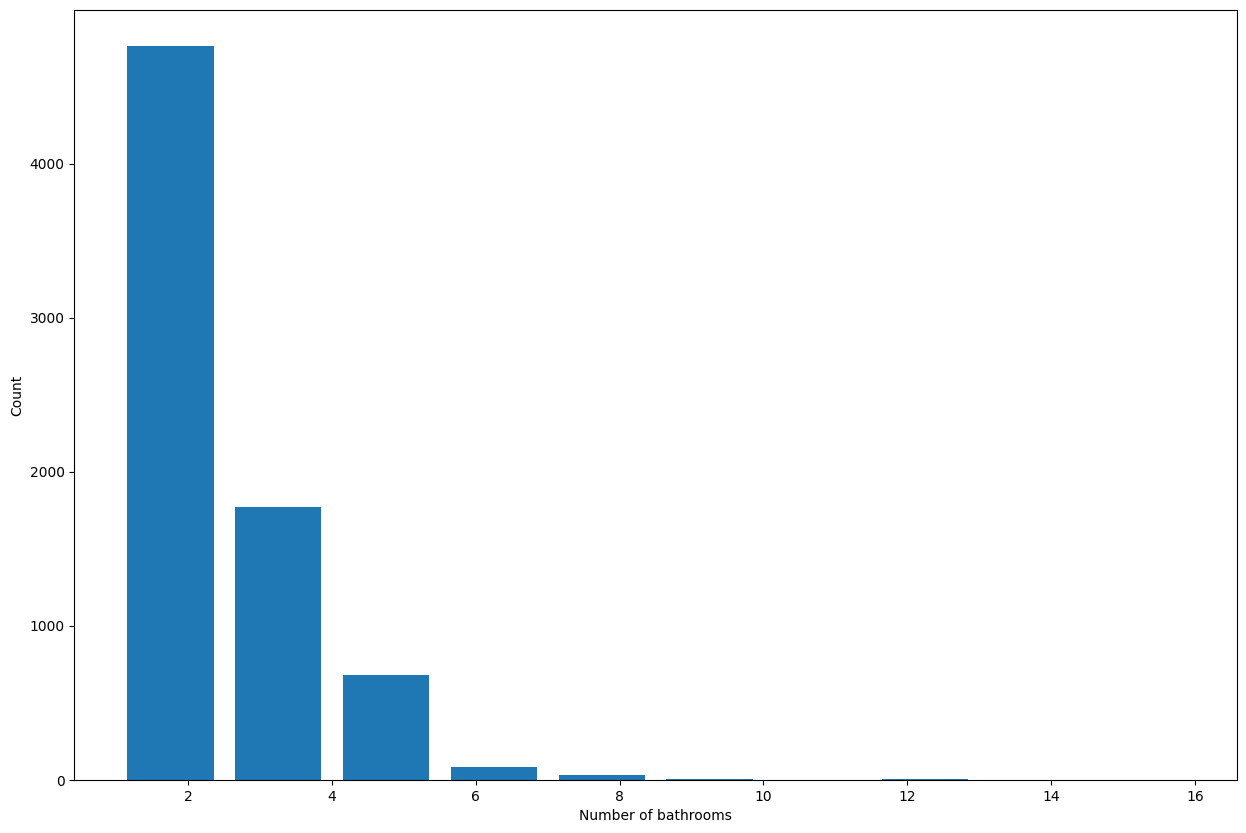

In [160]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [161]:
print(df.shape , df.location.value_counts())
df = df[df.bath<=10]
print(df.shape , df.location.value_counts())

(7335, 6) location
Others                   1138
Whitefield                246
Sarjapur  Road            191
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
HAL 2nd Stage               4
Vishveshwarya Layout        4
Vishwapriya Layout          4
Thyagaraja Nagar            4
Marsur                      3
Name: count, Length: 242, dtype: int64
(7330, 6) location
Others                   1134
Whitefield                246
Sarjapur  Road            191
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
HAL 2nd Stage               4
Vishveshwarya Layout        4
Vishwapriya Layout          4
Thyagaraja Nagar            4
Marsur                      3
Name: count, Length: 242, dtype: int64


In [162]:
print(df.shape , df.location.value_counts())
df = df[df.bath < df.BHK+2]
print(df.shape , df.location.value_counts())

(7330, 6) location
Others                   1134
Whitefield                246
Sarjapur  Road            191
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
HAL 2nd Stage               4
Vishveshwarya Layout        4
Vishwapriya Layout          4
Thyagaraja Nagar            4
Marsur                      3
Name: count, Length: 242, dtype: int64
(7254, 6) location
Others                   1117
Whitefield                243
Sarjapur  Road            186
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Vishwapriya Layout          4
Nagasandra                  4
2nd Stage Nagarbhavi        4
Thyagaraja Nagar            4
Marsur                      3
Name: count, Length: 242, dtype: int64


In [163]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [164]:
df.reset_index(drop=True, inplace=True)

In [165]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


In [166]:
df = df.drop(['price_per_sqft'],axis='columns')
df.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0


In [167]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
location_dummy = ohe.fit_transform(df[['location']]).toarray()
# location_dummy.reshape(-1, 1)
location_dummy = pd.DataFrame(location_dummy , columns = ohe.categories_[0])
location_dummy

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
df = pd.concat([df , location_dummy] , axis='columns')
df.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
df.drop(['location' , 'Others'] , axis='columns' , inplace=True)

In [170]:
df.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,235.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,130.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1235.0,2.0,148.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
print(df.shape)

(7254, 245)


##        Let's start with model creation

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
X = df.drop(["price"] , axis='columns')
y = df.price
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Ridge(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [173]:
# df_check = find_best_model_using_gridsearchcv(X ,y)

In [174]:
# df_check

In [175]:
lr_model = LinearRegression()
lr_model.fit(X , y)

LinearRegression()

In [176]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [177]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\Mrinal\Desktop\ML_Notes\House_Prediction_Project\house_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.55014895339394

In [178]:
# import pickle
# with open('banglore_home_prices_model.pickle','wb') as f:
#     pickle.dump(lr_model,f)

In [179]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))